In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
    

In [4]:
st =  pickle.load(open('ZNE_data.pkl', "rb"))
meta = pickle.load(open('Meta_manual.pkl', "rb"))

In [11]:
SKSarrival = meta.ttime

In [5]:

time = st[0].times(reftime = meta.time )
tr_Z = st.select(component='Z')[0]
tr_N = st.select(component='N')[0]
tr_E = st.select(component='E')[0]

In [6]:
st_copy = st.copy()
st_copy.detrend('demean')
st_copy.detrend('linear')

st_copy.filter('bandpass',freqmin=0.05,freqmax=0.125,corners=4,zerophase=True)
tr_Z_ = st_copy.select(component='Z')[0]
tr_N_ = st_copy.select(component='N')[0]
tr_E_ = st_copy.select(component='E')[0]

In [7]:
st_RT = st_copy.copy()
st_RT.rotate('NE->RT', back_azimuth=meta.baz)
tr_R = st_RT.select(component='R')[0]
tr_T = st_RT.select(component='T')[0]

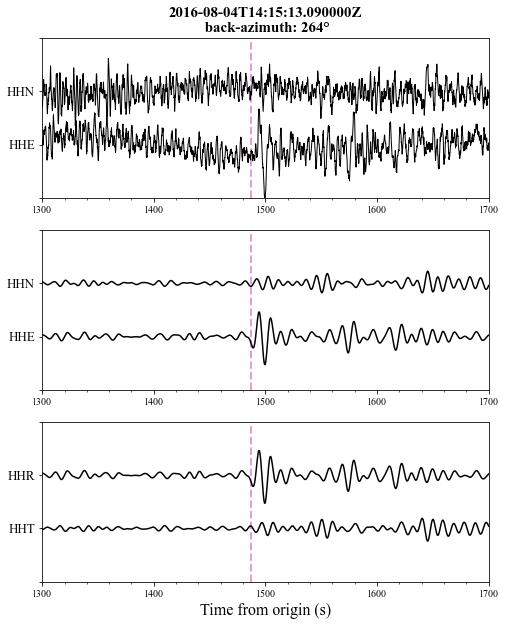

In [20]:
pmax = max(max(abs(tr_Z.data)),max(abs(tr_E.data)),max(abs(tr_N.data)))

fig,ax = plt.subplots(3,1,figsize=(8,10))

plt.rcParams["font.family"] = "Times New Roman"
plt.subplot(311)
plt.title(f'{meta.time}\n back-azimuth: {int(meta.baz)}°', fontsize=15, fontweight='bold' )

# plt.plot(time, tr_Z.data/pmax + 0, 'k')
plt.vlines(x=SKSarrival,ymin=0,ymax=3,ls='--',color='plum',lw=2)
plt.plot(time, tr_N.data/pmax + 2, 'k', lw=1)
plt.plot(time, tr_E.data/pmax + 1, 'k', lw=1)
plt.xlim(1300,1700)
plt.ylim(0,3)
plt.yticks(range(0,3+1,1),['','HHE','HHN',''],fontsize=13)
ax[0].xaxis.set_minor_locator(MultipleLocator(20))
ax[0].xaxis.set_major_locator(MultipleLocator(100))
plt.subplot(312)
# plt.plot(time, tr_Z_.data/pmax + 0, 'k')
plt.vlines(x=SKSarrival,ymin=0,ymax=3,ls='--',color='plum',lw=2)
plt.plot(time, tr_N_.data/pmax + 2, 'k')
plt.plot(time, tr_E_.data/pmax + 1, 'k')
plt.xlim(1300,1700)
plt.ylim(0,3)
plt.yticks(range(0,3+1,1),['','HHE','HHN',''],fontsize=13)
ax[1].xaxis.set_minor_locator(MultipleLocator(20))
ax[1].xaxis.set_major_locator(MultipleLocator(100))
plt.subplot(313)
# plt.plot(time, tr_Z_.data/pmax + 0, 'k')
plt.vlines(x=SKSarrival,ymin=0,ymax=3,ls='--',color='plum',lw=2)
plt.plot(time, tr_R.data/pmax + 2, 'k')
plt.plot(time, tr_T.data/pmax + 1, 'k')
plt.yticks(range(0,3+1,1),['','HHT','HHR',''],fontsize=13)
plt.xlim(1300,1700)
plt.ylim(0,3)
plt.xlabel('Time from origin (s)',fontsize=16)
ax[2].xaxis.set_minor_locator(MultipleLocator(20))
ax[2].xaxis.set_major_locator(MultipleLocator(100))

plt.savefig('NE2RT_v2.png', dpi=300)
plt.savefig('NE2RT_v2.pdf')